# MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)

### => Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
# from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

### => Loading the MNIST data from keras.datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


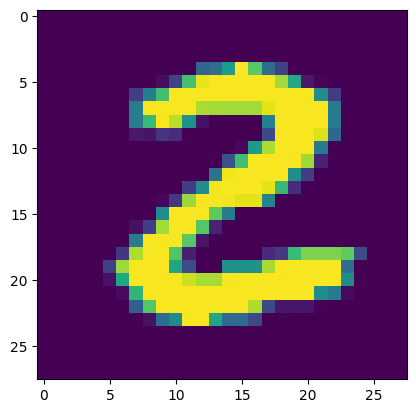

2


In [7]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:

# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [10]:
# scaling the values

X_train = X_train/255
X_test = X_test/255
     

In [11]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [12]:

# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])
     

In [13]:

# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
     

In [14]:

# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3065 - accuracy: 0.9110
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1453 - accuracy: 0.9567
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1093 - accuracy: 0.9669
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0883 - accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0733 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0624 - accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0558 - accuracy: 0.9824
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0490 - accuracy: 0.9841
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0427 - accuracy: 0.9860
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.037

Training data accuracy = 98.9%

### => Accuracy on Test data:

In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1002 - accuracy: 0.9737
0.9736999869346619


Test data accuracy = 97.1%

In [16]:
print(X_test.shape)

(10000, 28, 28)


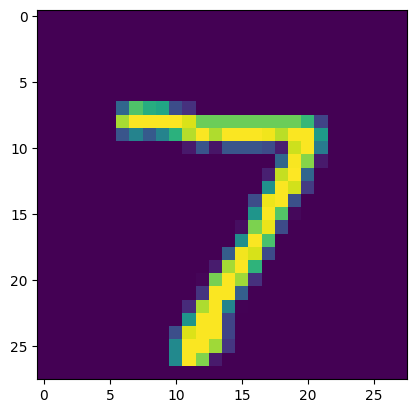

In [17]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [19]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])

[2.7708206e-03 2.3557404e-01 2.2293340e-01 8.9700001e-01 7.8324902e-06
 3.5150561e-03 6.5592744e-08 9.9999583e-01 9.9116348e-02 8.8188070e-01]


model.predict() gives the prediction probability of each class for that data point

In [22]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [23]:

# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

Confusin Matrix

In [24]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 969    0    2    1    0    1    3    0    2    2]
 [   1 1120    4    3    0    1    2    0    4    0]
 [   5    2 1001    7    1    2    2    4    8    0]
 [   0    0    5  977    1   18    0    4    3    2]
 [   0    0    4    0  959    3    3    5    0    8]
 [   2    0    0    5    1  874    4    0    3    3]
 [   3    2    2    1    4   12  933    0    1    0]
 [   2    3    9    2    0    0    0 1003    0    9]
 [   4    0    6    6    7   16    0    3  929    3]
 [   1    4    0    7   13    7    0    4    2  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

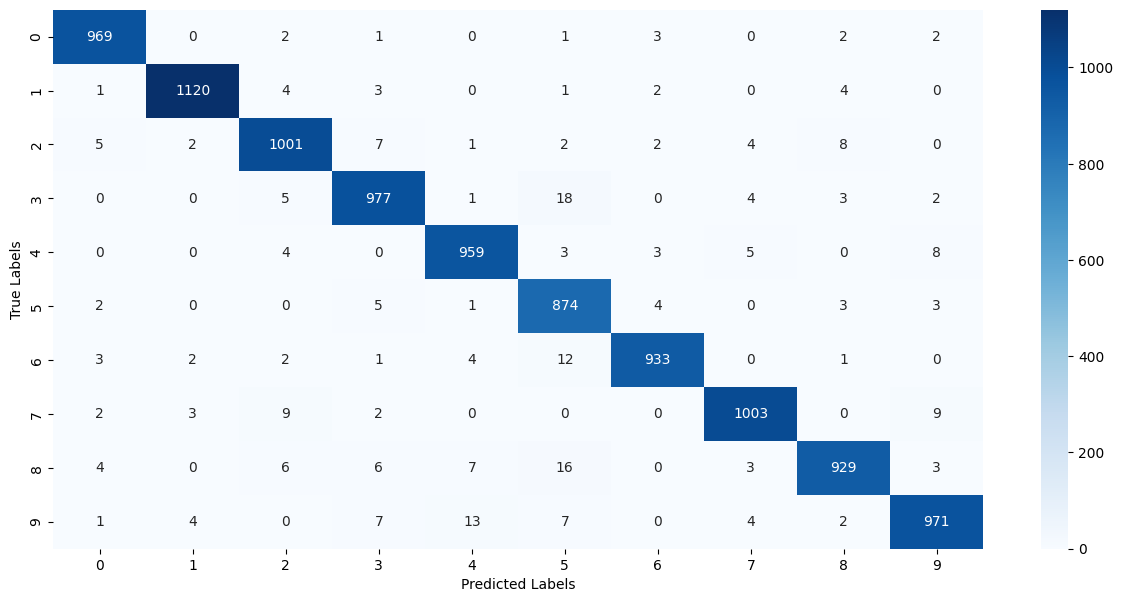

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
     

### => Building a Predictive System

In [27]:
input_image_path = 'F:/PKC 2024/DL-project_series1-5/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [28]:

type(input_image)

numpy.ndarray

In [29]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [41]:
import cv2

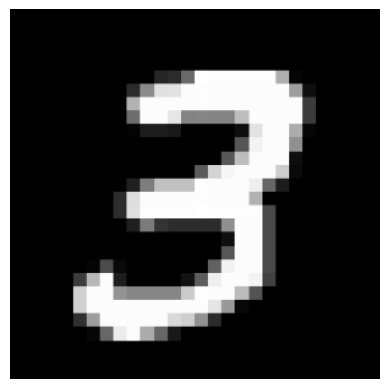

In [63]:
import cv2
import matplotlib.pyplot as plt

# Load your image
input_image = cv2.imread('F:/PKC 2024/DL-project_series1-5/MNIST_digit.png')

# Convert the image from BGR to RGB format
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(input_image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

In [64]:
input_image.shape

(318, 318, 3)

In [65]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [66]:
grayscale.shape
     

(318, 318)

In [67]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [68]:
input_image_resize.shape

(28, 28)

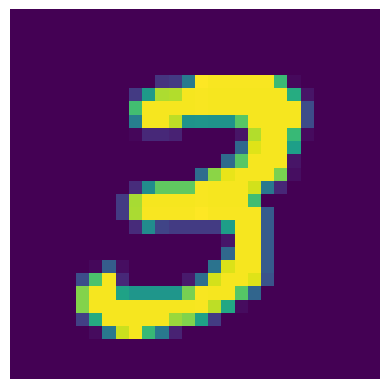

In [69]:
import cv2
import matplotlib.pyplot as plt

# # Load your image
# input_image = cv2.imread('F:/PKC 2024/DL-project_series1-5/MNIST_digit.png')

# Convert the image from BGR to RGB format
# input_image_rgb = cv2.cvtColor(input_image_resize, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(input_image_resize)
plt.axis('off')  # Turn off axis labels
plt.show()

In [70]:
input_image_resize = input_image_resize/255

In [71]:
type(input_image_resize)

numpy.ndarray

In [72]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [73]:

input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 24ms/step
[[1.75324322e-09 3.84049636e-04 1.03401835e-04 1.00000000e+00
  5.79581494e-10 9.77304041e-01 9.07767115e-16 3.76954384e-04
  1.07344002e-01 6.52749956e-01]]


In [74]:
input_pred_label = np.argmax(input_prediction)

In [75]:
print(input_pred_label)

3


### =>  Predictive System :

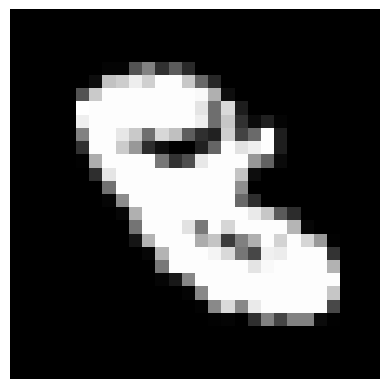

1/1 [==============================] - 0s 19ms/step
The Handwritten Digit is recognised as  8


In [51]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

# Convert the image from BGR to RGB format
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(input_image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)